In [74]:
# Necessary Library
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn import cluster
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [8]:
data = pd.read_csv('CreditCardUsage.csv')

## Preprocessing

In [9]:
data.shape

(8950, 18)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [12]:
pandas_profiling.ProfileReport(data)

In [13]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [16]:
data['CUST_ID'].shape

(8950,)

In [18]:
data.drop(columns='CUST_ID',inplace=True)

In [21]:
data['BALANCE'].unique().shape

(8871,)

In [24]:
data['BALANCE_FREQUENCY'].unique().shape

(43,)

In [30]:
data['PURCHASES'].unique().shape

(6203,)

In [31]:
data['ONEOFF_PURCHASES'].unique().shape

(4014,)

In [35]:
data.drop(columns='ONEOFF_PURCHASES',inplace = True)

In [39]:
data['CREDIT_LIMIT'].isna().sum()

1

In [40]:
data['MINIMUM_PAYMENTS'].isna().sum()

313

In [42]:
data.dropna(subset=["CREDIT_LIMIT"], inplace= True)

In [43]:
data.dropna(subset=["MINIMUM_PAYMENTS"], inplace= True)

In [44]:
data.shape

(8636, 16)

## Explorartory Data Analysis(EDA)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 16 columns):
BALANCE                             8636 non-null float64
BALANCE_FREQUENCY                   8636 non-null float64
PURCHASES                           8636 non-null float64
INSTALLMENTS_PURCHASES              8636 non-null float64
CASH_ADVANCE                        8636 non-null float64
PURCHASES_FREQUENCY                 8636 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8636 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8636 non-null float64
CASH_ADVANCE_FREQUENCY              8636 non-null float64
CASH_ADVANCE_TRX                    8636 non-null int64
PURCHASES_TRX                       8636 non-null int64
CREDIT_LIMIT                        8636 non-null float64
PAYMENTS                            8636 non-null float64
MINIMUM_PAYMENTS                    8636 non-null float64
PRC_FULL_PAYMENT                    8636 non-null float64
TENURE                     

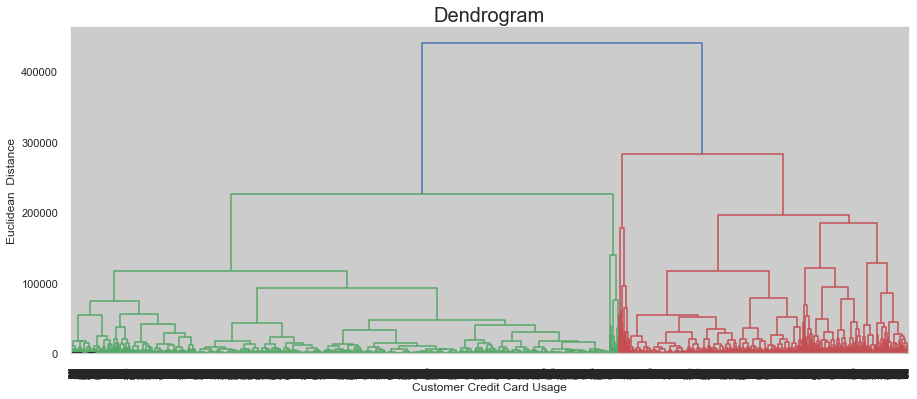

In [49]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(data.values, method = 'ward'))
plt.hlines(y=190,xmin=0,xmax=2500,lw=3,linestyles='--')
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customer Credit Card Usage')
plt.ylabel('Euclidean  Distance')
plt.show()

## Modeling

In [154]:
X_scaled = MinMaxScaler().fit_transform(data)

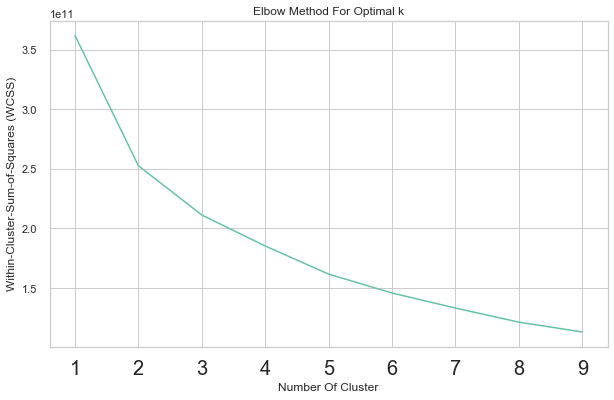

In [164]:
wcss = []
k_range = range(1,10)
for k in k_range:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
  ##  print("-----------------------------------")
  ##  print(k,":",centroids)
  ##  print("-----------------------------------")
    kmeans.predict(data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(k_range, wcss)
plt.xlabel('Number Of Cluster')
plt.xticks(fontsize=20)
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()                            

In [165]:
print(wcss)

[361949264522.0951, 252589055650.65457, 211207476311.25186, 185182723855.8879, 161591241910.71793, 145691205877.7386, 133096307895.69681, 121251019373.18301, 112995490890.62273]


In [166]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
print("-----------------------------------")
print(centroids)
print("-----------------------------------")
data['Y_PREDICTED']=kmeans.predict(data)

-----------------------------------
[[8.76048666e+02 8.75672908e-01 6.26143891e+02 2.98878730e+02
  4.96311945e+02 4.73987085e-01 1.57787800e-01 3.57142446e-01
  1.08540238e-01 2.29003215e+00 1.09667203e+01 2.71952952e+03
  1.04163784e+03 5.69236435e+02 1.64235041e-01 1.14524116e+01
  1.33051447e+01]
 [5.01198938e+03 9.13475864e-01 9.21449558e+03 2.83679000e+03
  6.31065201e+03 6.82941653e-01 5.18296687e-01 5.62035823e-01
  2.82798816e-01 1.12585034e+01 7.29387755e+01 1.22486395e+04
  1.75341219e+04 2.45922375e+03 3.02272680e-01 1.18503401e+01
  8.85714286e+00]
 [3.36817674e+03 9.46917929e-01 1.58946721e+03 5.98665015e+02
  2.01453225e+03 5.44232661e-01 3.17584027e-01 3.88315216e-01
  2.07870516e-01 5.60599383e+00 2.24292640e+01 8.96287111e+03
  2.80046257e+03 1.56984618e+03 1.36522725e-01 1.17386514e+01
  8.61216395e+00]]
-----------------------------------


In [167]:
data.columns


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Y_PREDICTED'],
      dtype='object')

In [168]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Y_PREDICTED
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


In [169]:
data.groupby('Y_PREDICTED').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Y_PREDICTED,,,,,,,,,,,,,,,,
0,875.955794,0.875641,625.483513,298.636518,496.192627,0.473949,0.157659,0.357045,0.108544,2.290473,10.959446,2715.879238,1040.631155,569.500989,0.164295,11.452527
1,5011.989381,0.913476,9214.495578,2836.790000,6310.652012,0.682942,0.518297,0.562036,0.282799,11.258503,72.938776,12248.639456,17534.121905,2459.223748,0.302273,11.850340
2,3361.857771,0.946818,1588.730347,598.535956,2010.854061,0.544153,0.317516,0.388500,0.207597,5.596044,22.418901,8956.375624,2798.573604,1566.484594,0.136432,11.737582


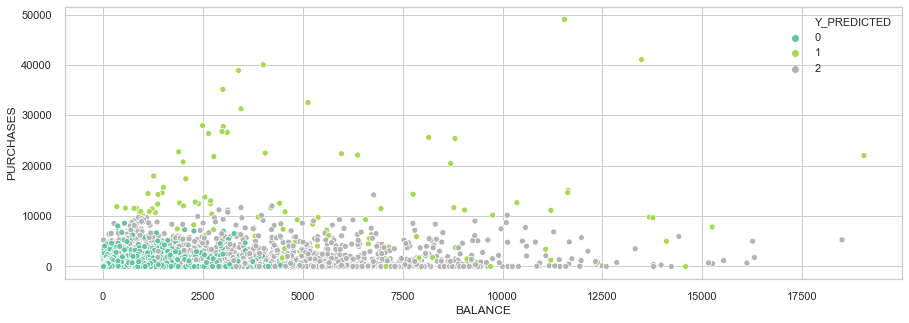

In [170]:
plt.figure(figsize=(15,5))
sns.set_palette('Set2')
sns.scatterplot(data['BALANCE'],data['PURCHASES'],hue=data['Y_PREDICTED'],palette='Set2')